In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### Load the Dataset

In [107]:
stock_data = pd.read_csv('dataset/AAPL.csv')

In [108]:
stock_data.head(10)

,ticker,date,open,high,low,close
0,AAPL,1980-12-12,0.13,0.13,0.13,0.13
1,AAPL,1980-12-15,0.12,0.12,0.12,0.12
2,AAPL,1980-12-16,0.11,0.11,0.11,0.11
3,AAPL,1980-12-17,0.12,0.12,0.12,0.12
4,AAPL,1980-12-18,0.12,0.12,0.12,0.12
5,AAPL,1980-12-19,0.13,0.13,0.13,0.13
6,AAPL,1980-12-22,0.13,0.13,0.13,0.13
7,AAPL,1980-12-23,0.14,0.14,0.14,0.14
8,AAPL,1980-12-24,0.15,0.15,0.15,0.15
9,AAPL,1980-12-26,0.16,0.16,0.16,0.16


In [109]:
stock_data.shape

(11091, 6)

In [110]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11091 entries, 0 to 11090
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  11091 non-null  object 
 1   date    11091 non-null  object 
 2   open    11091 non-null  float64
 3   high    11091 non-null  float64
 4   low     11091 non-null  float64
 5   close   11091 non-null  float64
dtypes: float64(4), object(2)
memory usage: 520.0+ KB


In [111]:
stock_data.dtypes

ticker     object
date       object
open      float64
high      float64
low       float64
close     float64
dtype: object

In [112]:
stock_data['date'] = pd.to_datetime(stock_data['date'])

In [113]:
stock_data.dtypes

ticker            object
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
dtype: object

In [114]:
stock_data.isna().sum()

ticker    0
date      0
open      0
high      0
low       0
close     0
dtype: int64

#### Set date column as index

In [115]:
stock_data.set_index('date', inplace=True)
stock_data.sort_index(inplace=True)

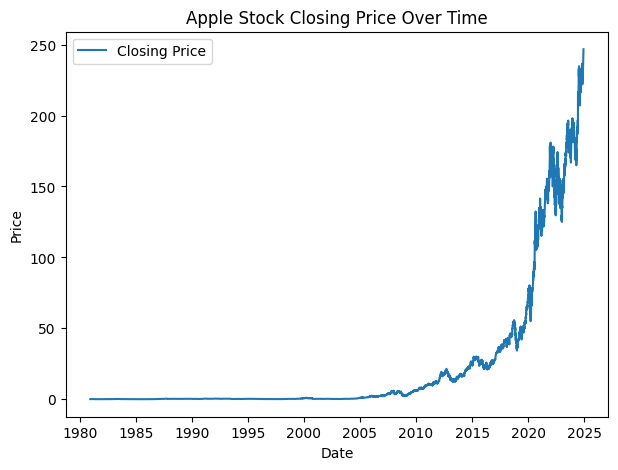

In [116]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(stock_data['close'], label='Closing Price')
# ax.grid(color="black", linestyle="--", linewidth=0.5)
ax.set_title("Apple Stock Closing Price Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
plt.show()

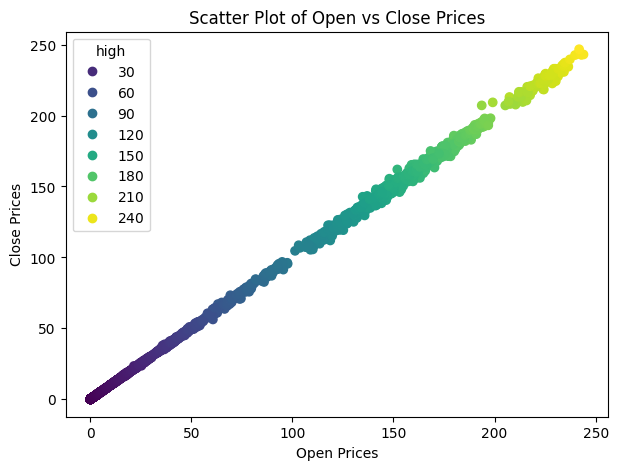

In [117]:
fig, ax = plt.subplots(figsize=(7, 5))
scatter = ax.scatter(x=stock_data['open'], 
           y=stock_data['close'], 
           c=stock_data['high'])
ax.set(title='Scatter Plot of Open vs Close Prices',
       xlabel='Open Prices',
       ylabel='Close Prices')
ax.legend(*scatter.legend_elements(), title='high')
plt.show()

#### Simple moving average

In [118]:
stock_data['SMA_5'] = stock_data['close'].rolling(window=5).mean()
stock_data.head(10)

,ticker,open,high,low,close,SMA_5
date,,,,,,
1980-12-12,AAPL,0.13,0.13,0.13,0.13,NaN
1980-12-15,AAPL,0.12,0.12,0.12,0.12,NaN
1980-12-16,AAPL,0.11,0.11,0.11,0.11,NaN
1980-12-17,AAPL,0.12,0.12,0.12,0.12,NaN
1980-12-18,AAPL,0.12,0.12,0.12,0.12,0.120
1980-12-19,AAPL,0.13,0.13,0.13,0.13,0.120
1980-12-22,AAPL,0.13,0.13,0.13,0.13,0.122
1980-12-23,AAPL,0.14,0.14,0.14,0.14,0.128
1980-12-24,AAPL,0.15,0.15,0.15,0.15,0.134


#### Drop any rows where SMA_5 is NaN

In [119]:
stock_data.dropna(subset=['SMA_5'], inplace=True)

In [120]:
stock_data.head(10)

,ticker,open,high,low,close,SMA_5
date,,,,,,
1980-12-18,AAPL,0.12,0.12,0.12,0.12,0.120
1980-12-19,AAPL,0.13,0.13,0.13,0.13,0.120
1980-12-22,AAPL,0.13,0.13,0.13,0.13,0.122
1980-12-23,AAPL,0.14,0.14,0.14,0.14,0.128
1980-12-24,AAPL,0.15,0.15,0.15,0.15,0.134
1980-12-26,AAPL,0.16,0.16,0.16,0.16,0.142
1980-12-29,AAPL,0.16,0.16,0.16,0.16,0.148
1980-12-30,AAPL,0.16,0.16,0.16,0.16,0.154
1980-12-31,AAPL,0.15,0.15,0.15,0.15,0.156


#### Split Time Series Data

In [121]:
x = stock_data['SMA_5'].values
y = stock_data['close'].values

split_point = int(len(x) * 0.8)
x_train, x_test = x[:split_point], x[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

#### Create and Train the Model

In [122]:
model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.8228932549460835


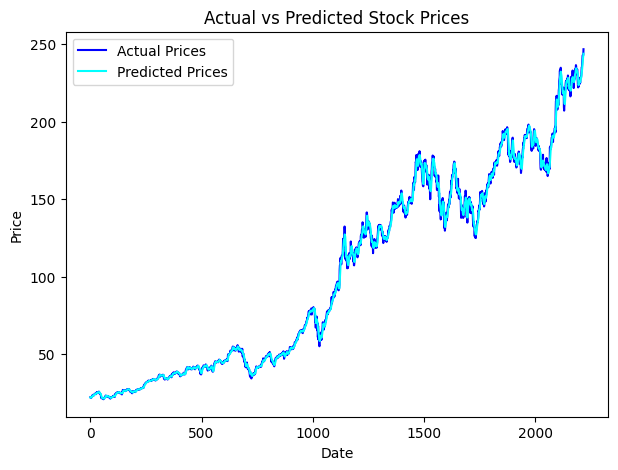

In [123]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(y_test, label='Actual Prices', color='blue')
ax.plot(predictions, label='Predicted Prices', color='cyan')
ax.set_title("Actual vs Predicted Stock Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
plt.show()

#### Predict next 3 days of prices using model based recursive forecasting

In [124]:
last_date = stock_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=3, freq='B')
future_sma_values = [stock_data['SMA_5'].iloc[-1]]

for _ in range(3):
    sma_value = np.array(future_sma_values[-1]).reshape(1, -1)
    next_day_prediction = model.predict(sma_value)
    next_day_prediction_value = float(next_day_prediction[0])
    last_4_days = stock_data['close'].iloc[-4:].tolist()
    new_sma_5 = (sum(last_4_days) + next_day_prediction_value) / 5
    future_sma_values.append(new_sma_5)

future_predictions = future_sma_values[1:]
print(f"Future predictions: {future_predictions}")

Future predictions: [243.8978363160476, 243.9458407764689, 243.9554491137646]


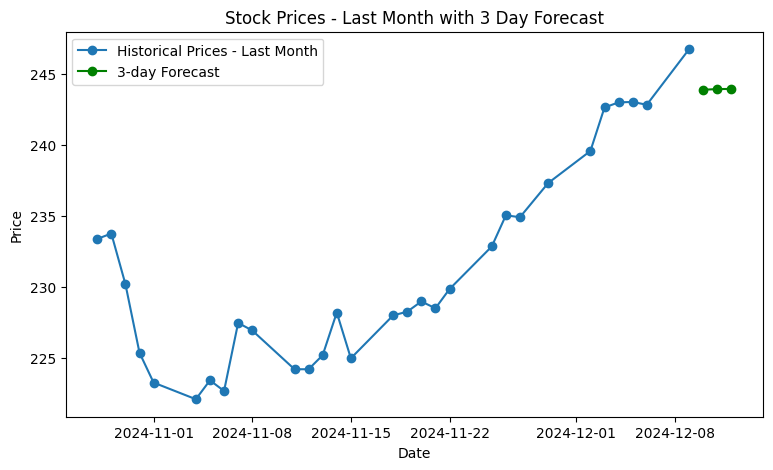

In [125]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(stock_data.index[-30:], stock_data['close'].iloc[-30:], label='Historical Prices - Last Month', marker='o')
ax.plot(future_dates, future_predictions, label='3-day Forecast', color='green', marker='o')
ax.set_title("Stock Prices - Last Month with 3 Day Forecast")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
plt.show()